<a href="https://colab.research.google.com/github/malinphy/IMDB_Analysis_different_approachs/blob/main/IMDB_ML_VS_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import os
import re 
from collections import Counter
import seaborn as sns

In [2]:
data_dir ='https://raw.githubusercontent.com/malinphy/IMDB_Analysis_different_approachs/main/IMDB_Dataset_short2.csv'

data = pd.read_csv(data_dir)

data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [3]:
data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [4]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [5]:
pos,neg= data.groupby('sentiment')['review'].nunique()[0],data.groupby('sentiment')['review'].nunique()[1]
pols = pos, neg

pols_name =  ['pos', ' neg'] 

pols_name

['pos', ' neg']

In [6]:
my_fig = px.bar(
                x = pols_name,  y= pols,color=["rgb(254, 217,166)", "goldenrod"],
                template  ="plotly_dark",
                labels=["bara","bir"], 
                width = 550 , 
                height = 500
               )
#my_fig.update_layout(legends=(["bara","bir"]))
my_fig.show()

In [7]:
data_reviews = data['review'].copy()

In [8]:
for i in range(len(data_reviews)):
    data_reviews[i] = re.sub("<br /><br />|,|\?|\(|\)|\"|!|:|@|#|&|\+"," ",data_reviews[i])
    data_reviews[i] = re.sub("-|_|\."," ",data_reviews[i])
    data_reviews[i] = data_reviews[i].lower()
    data_reviews[i] = re.sub("1|2|3|4|5|6|7|8|9|0","",data_reviews[i])
    data_reviews[i] = re.sub("  "," ",data_reviews[i])
    data_reviews[i] = re.sub("   "," ",data_reviews[i])

In [9]:
data_reviews[0]

"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more  so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare forget pretty 

In [10]:
def SentenceLen (X):
    empty_counter = []
    for i in range(len(X)):
        empty_counter.append(len(X[i].split()))
        
    return empty_counter

In [11]:
lengthOfEntries=np.array(SentenceLen(data_reviews))
sek = np.arange(len(lengthOfEntries))

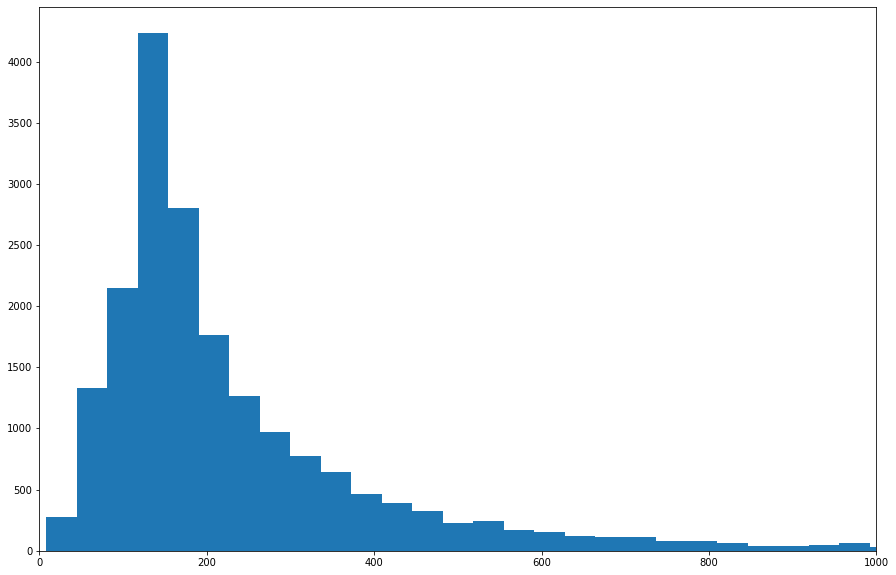

In [12]:
plt.figure(figsize=(15,10))
plt.xlim([0,1000])
my_fig = plt.hist(lengthOfEntries,bins =50,
                #color=["blue"],
                #template  ="plt_dark",
                #labels=["bara","bir"], 
                #width = 550 , 
                #height = 500,
            
               )


In [13]:
def word_counter(x):
    
    splitter = []
    for i in x:
        var1 = i.split()
        for j in var1:
            splitter.append(j)
            
    word_number_count = Counter(splitter).most_common()
    
    words = []
    words_number = []
    
    for i in word_number_count:
        words.append(i[0])
        words_number.append(i[1])
    
    
    words = words[0:50]
    words_number = words_number[0:50]
    
    total_words = (np.array(word_number_count)[:,1]).astype('int64')
    totalNumberOfWords=np.sum(total_words)
    return words,words_number, totalNumberOfWords

In [14]:
mostCommonWords, wordDensity, totalNumber = word_counter(data_reviews)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

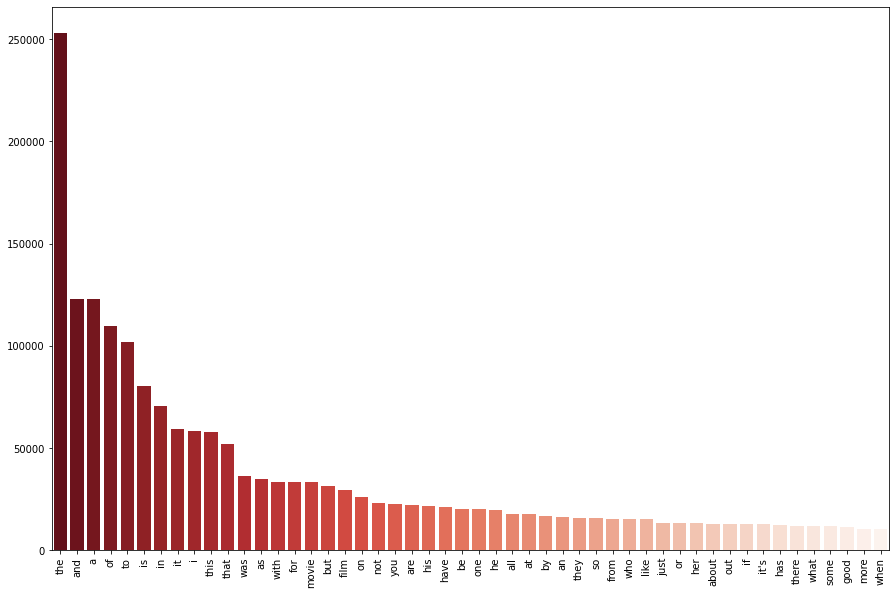

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(mostCommonWords,wordDensity, palette="Reds_r")
plt.xticks(rotation=90)
plt.show

#As seen form this graph, data was dominated by the stop words!! Therefore, I will strip the stopwords using the nltk stopword library


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
clean_data_reviews = []
for k in data_reviews:
  k = pattern.sub("",k)
  clean_data_reviews.append(k)

In [18]:
len(clean_data_reviews)

18999

In [19]:
clean_data_reviews[0]

"one reviewers mentioned watching oz episode 'hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows 'dare forget pretty pictures painted mainstream audiences forget charm forget romance  oz 'mess around first episode ever saw struck nasty surreal 'say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards 'sold nickel inmates 'kill order get away well mannered middle class inmates turned prison bitches due lack stree

In [20]:
data_reviews[0]

"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more  so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare forget pretty 

In [21]:
mostCommonWords_clean, wordDensity_clean, totalNumber_clean = word_counter(clean_data_reviews)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

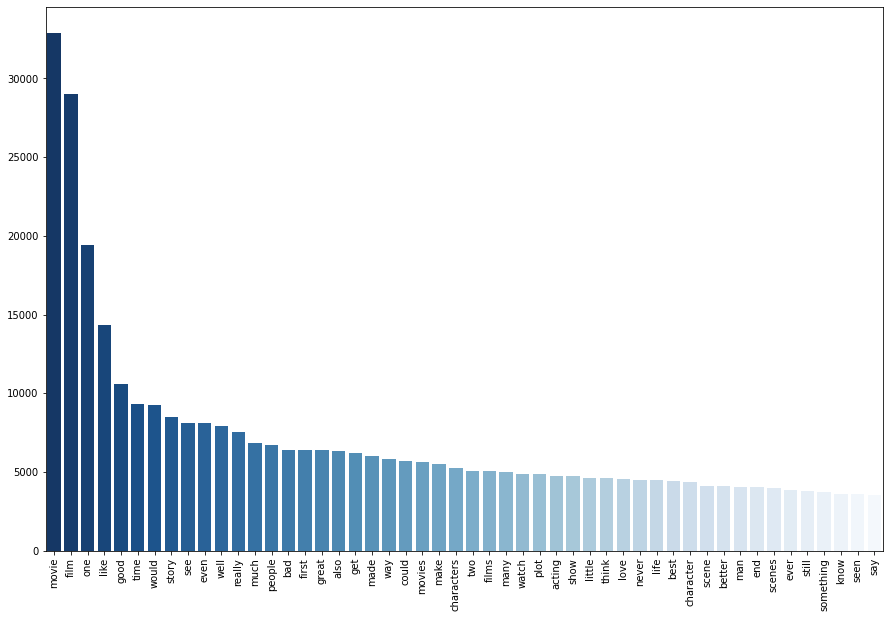

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(mostCommonWords_clean,wordDensity_clean, palette="Blues_r")
plt.xticks(rotation=90)
plt.show

In [23]:
from sklearn.feature_extraction.text import CountVectorizer



In [24]:
vectorizer = CountVectorizer(stop_words='english')

reviews_vector = vectorizer.fit_transform(data_reviews)
#vectorizer.get_feature_names()

In [25]:
reviews_vector.toarray().shape

(18999, 67017)

In [26]:

#vectorizer for the sentiment values

sentiment_scores = data['sentiment'].copy()

sentiment_vectorizer = CountVectorizer().fit_transform(sentiment_scores)
sentiment_vector=sentiment_vectorizer.toarray()

In [27]:
sentiment_vector_1D = np.zeros(len(sentiment_vector))


for i in range(len(sentiment_vector)):
    sentiment_vector_1D[i] = sentiment_vector[i][0]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
reviews_train, reviews_test , sentiment_train, sentiment_test = train_test_split(
                                                                reviews_vector, sentiment_vector_1D,
                                                                train_size = 0.8 , random_state=42)

In [30]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

$\textbf{Logistic Regression classifier}$

In [31]:

from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()

LG.fit(reviews_train,sentiment_train)

sentiment_predict_score_LG=LG.predict(reviews_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [32]:
reviews_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [34]:
sentiment_predict_score_LG

array([0., 1., 0., ..., 1., 1., 0.])

In [35]:
sentiment_test

array([0., 1., 0., ..., 1., 0., 0.])

In [48]:
from sklearn.metrics import precision_recall_fscore_support

In [49]:
y_true_LG = sentiment_test 
y_pred_LG = sentiment_predict_score_LG

LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
confusion_matrix(y_true_LG, y_pred_LG)

array([[1671,  209],
       [ 238, 1682]])

Text(0.5, 1.0, 'confusion matrix without normalization Logistic Regression')

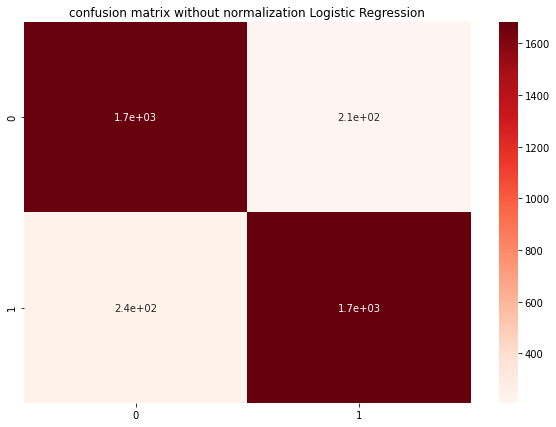

In [51]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_true_LG, y_pred_LG),annot=True,cmap=plt.cm.Reds)
plt.title('confusion matrix without normalization Logistic Regression')

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

DTC_fit=DTC.fit(reviews_train,sentiment_train)

sentiment_predict_score_DTC=DTC_fit.predict(reviews_test)

y_true_DTC = sentiment_test 
y_pred_DTC = sentiment_predict_score_DTC

DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
confusion_matrix(y_true_DTC, y_pred_DTC)

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_DTC, y_pred_DTC),annot=True,cmap=plt.cm.Greens)
plt.title('confusion matrix without normalization for Decision Tree')

$\textit{Random Forest Classifier}$

from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier()
RFC_fit=RFC.fit(reviews_train,sentiment_train)
sentiment_predict_score_RFC=RFC_fit.predict(reviews_test)

y_true_RFC = sentiment_test 
y_pred_RFC = sentiment_predict_score_DTC

RF_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
confusion_matrix(y_true_RFC, y_pred_RFC)

from sklearn.pipeline import Pipeline

def different_classifiers(X_train,y_train,X_test,y_test):

    #------ LOGISTIC REGRESSION
    
    LG = LogisticRegression()

    LG.fit(X_train,y_train)

    sentiment_predict_score_LG=LG.predict(X_test)
    
    y_true_LG = y_test 
    y_pred_LG = sentiment_predict_score_LG

    LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
    LG_confusion_matrix=confusion_matrix(y_true_LG, y_pred_LG)
    
    #------ LOGISTIC REGRESSION
    
    
    
    #------ RANDOM FOREST CLASSIFIER
    
    RFC= RandomForestClassifier()
    RFC_fit=RFC.fit(X_train,y_train)
    sentiment_predict_score_RFC=RFC_fit.predict(X_test)

    y_true_RFC = y_test  
    y_pred_RFC = sentiment_predict_score_RFC

    LG_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
    RFC_confusion_matrix = confusion_matrix(y_true_RFC, y_pred_RFC)
    
    #------ RANDOM FOREST CLASSIFIER
    
    
    #------ DECISION TREE CLASSIFIER
    
    DTC = DecisionTreeClassifier(random_state=0 )  
    DTC_fit = DTC.fit(X_train,y_train)
    sentiment_predict_score_DTC=DTC_fit.predict(X_test)
                                 
    y_true_DTC = y_test 
    y_pred_DTC = sentiment_predict_score_DTC

    DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
    DTC_confusion_matrix = confusion_matrix(y_true_DTC, y_pred_DTC)
    
    #------ DECISION TREE CLASSIFIER
    
    
    return LG_confusion_matrix,RFC_confusion_matrix,DTC_confusion_matrix

Logistic_Reg, Random_For,Decision_Tree = different_classifiers(reviews_train,
                                                              sentiment_train,
                                                              reviews_test,
                                                              sentiment_test)

print("Logistic Regression CM :\n",Logistic_Reg) , print("Random Forest CM:\n",Random_For), print("Decision Tree CM : \n", Decision_Tree)

In [36]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

keras_tokenizer = Tokenizer()

keras_tokenizer.fit_on_texts(data_reviews)

data_reviews_corpus = keras_tokenizer.word_index
# data_reviews_corpus_np = np.array(data_reviews_corpus)

keras_sequence = keras_tokenizer.texts_to_sequences(data_reviews)

len(keras_sequence[9])

padded_keras_sequence = pad_sequences(keras_sequence,padding='post')

In [37]:
#pad_sequences()

In [38]:
#keras_data_reviews=(keras_tokenizer.texts_to_matrix(data_reviews))
#

reviews_train_keras, reviews_test_keras , sentiment_train_keras, sentiment_test_keras = train_test_split(
                                                                padded_keras_sequence,
                                                                sentiment_vector_1D,
                                                                train_size = 0.8 ,
                                                                random_state=42)

DTC_keras = DecisionTreeClassifier(random_state=0)

DTC_fit_keras=DTC_keras.fit(reviews_train_keras,sentiment_train_keras)

sentiment_predict_score_DTC_keras=DTC_fit_keras.predict(reviews_test_keras)

y_true_DTC_keras = sentiment_test_keras 
y_pred_DTC_keras = sentiment_predict_score_DTC_keras

DTC_metrics_keras=precision_recall_fscore_support(y_true_DTC_keras,y_pred_DTC_keras,average=None)
confusion_matrix(y_true_DTC_keras, y_pred_DTC_keras)

Logistic_Reg_keras, Random_For_keras,Decision_Tree_keras = different_classifiers(
                                                              reviews_train_keras,
                                                              sentiment_train_keras,
                                                              reviews_test_keras,
                                                              sentiment_test_keras)


print("Logistic Regression CM_keras :\n",Logistic_Reg_keras) , print("Random Forest CM_keras:\n",Random_For_keras), print("Decision Tree CM_keras : \n", Decision_Tree_keras)

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

sw = (stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
from gensim.parsing.preprocessing import remove_stopwords

text = "Nick likes to play football, however he is not too fond of tennis."
filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)

In [41]:
for i in range (len(data_reviews)):
  data_reviews[i] = remove_stopwords(data_reviews[i])

In [42]:
data_reviews[0]

"reviewers mentioned watching oz episode you'll hooked right exactly happened thing struck oz brutality unflinching scenes violence set right word trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements far away main appeal fact goes shows wouldn't dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn't mess episode saw struck nasty surreal couldn't ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order away mannered middle class inmates turned prison bitches lack street skills prison experience watching oz comfortab

In [43]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa